In [40]:
import pandas as pd
import numpy as np
import os
import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.layers.pooling import MaxPooling2D as pooling

from sklearn.metrics import accuracy_score
from skimage import color

%load_ext tensorboard

import matplotlib.pyplot as plt

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [2]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_three/dw_matrix_road_sign"

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_three/dw_matrix_road_sign


In [0]:
train = pd.read_pickle("data/train.p")
test = pd.read_pickle("data/test.p")

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [0]:
if y_train.ndim == 1 : y_train = to_categorical(y_train)
if y_test.ndim == 1 : y_test = to_categorical(y_test)

In [0]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [6]:
model2 = Sequential([
        Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
        MaxPool2D(),
        Dropout(0.5),

        Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        MaxPool2D(),
        Dropout(0.3),

        Flatten(),
        Dense(1024, activation='relu'),
        Dropout(0.5),

        Dense(num_classes, activation='softmax'),
])
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

In [0]:
def get_cnn_v1(input_shape, num_classes):
  return Sequential([
        Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape),
        Flatten(),
        Dense(num_classes, activation='softmax'),
  ])

def train_model(model, X_train, y_train, params_fit={}):
  model.compile(loss='categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'], )

  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  model.fit(X_train, 
            y_train,
            bath_size = params_fit.get('bath_size', 128),
            epochs = params_fit.get('epochs', 5),
            verbose = params_fit.get('verbose', 1),
            validation_data = params_fit.get('validation_data', (X_train, y_train)),
            callbacks = [tensorboard_callback]
            )
  return model

In [8]:
model = get_cnn_v1(input_shape, num_classes)
model_trained = train_model(model, X_train, y_train)

Epoch 1/5
1088/1088 [==============================] - 13s 12ms/step - loss: 12.9582 - accuracy: 0.7638 - val_loss: 0.4748 - val_accuracy: 0.8860
Epoch 2/5
1088/1088 [==============================] - 13s 12ms/step - loss: 0.4887 - accuracy: 0.8865 - val_loss: 0.3328 - val_accuracy: 0.9148
Epoch 3/5
1088/1088 [==============================] - 13s 12ms/step - loss: 0.4162 - accuracy: 0.9038 - val_loss: 0.3034 - val_accuracy: 0.9270
Epoch 4/5
1088/1088 [==============================] - 13s 12ms/step - loss: 0.3396 - accuracy: 0.9234 - val_loss: 0.4214 - val_accuracy: 0.8957
Epoch 5/5
1088/1088 [==============================] - 14s 13ms/step - loss: 0.2878 - accuracy: 0.9345 - val_loss: 0.2460 - val_accuracy: 0.9393


In [0]:
def predict(trained_model, X_test, y_test, scoring=accuracy_score):
  y_test_norm = np.argmax(y_test, axis=1)
  y_pred_prob = trained_model.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)

  return scoring(y_pred, y_test_norm)

In [10]:
predict(model_trained, X_test, y_test)

0.7816326530612245

In [11]:
logdir = train_model(model2, X_test, y_test, params_fit = {'epochs':25})

Epoch 1/25
138/138 [==============================] - 2s 16ms/step - loss: 19.8386 - accuracy: 0.0488 - val_loss: 3.7021 - val_accuracy: 0.0544
Epoch 2/25
138/138 [==============================] - 2s 14ms/step - loss: 3.5650 - accuracy: 0.0893 - val_loss: 3.5291 - val_accuracy: 0.0760
Epoch 3/25
138/138 [==============================] - 2s 14ms/step - loss: 3.3213 - accuracy: 0.1451 - val_loss: 3.2671 - val_accuracy: 0.1503
Epoch 4/25
138/138 [==============================] - 2s 14ms/step - loss: 3.0505 - accuracy: 0.1984 - val_loss: 2.9452 - val_accuracy: 0.2440
Epoch 5/25
138/138 [==============================] - 2s 14ms/step - loss: 2.6897 - accuracy: 0.2755 - val_loss: 2.3584 - val_accuracy: 0.3766
Epoch 6/25
138/138 [==============================] - 2s 14ms/step - loss: 2.1439 - accuracy: 0.4066 - val_loss: 1.3196 - val_accuracy: 0.6671
Epoch 7/25
138/138 [==============================] - 2s 14ms/step - loss: 1.6188 - accuracy: 0.5340 - val_loss: 1.0668 - val_accuracy: 0.718

In [0]:
df = pd.read_csv('data/signnames.csv')
labels = dict(df.to_dict()['b'])

In [0]:
%tensorboard --logdir logs

In [33]:
predict(model2, X_train, y_train)

0.6409666944452427

In [34]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential([
        Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
        MaxPool2D(),
        Dropout(0.3),

        Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        MaxPool2D(),
        Dropout(0.3),

        Dense(1024,activation='relu'),
        Dropout(0.3),

        Flatten(),
        Dense(num_classes, activation='softmax'),
  ])

def train_and_predict(model):
  model_trained = train_model(model, X_train, y_train)
  return predict(model_trained, X_test, y_test)

train_and_predict( get_cnn_v2(input_shape, num_classes) )

Epoch 1/5
1088/1088 [==============================] - 19s 17ms/step - loss: 4.3553 - accuracy: 0.1562 - val_loss: 1.9796 - val_accuracy: 0.4271
Epoch 2/5
1088/1088 [==============================] - 18s 17ms/step - loss: 1.8696 - accuracy: 0.4364 - val_loss: 1.1174 - val_accuracy: 0.6729
Epoch 3/5
1088/1088 [==============================] - 18s 17ms/step - loss: 1.1894 - accuracy: 0.6396 - val_loss: 0.7171 - val_accuracy: 0.7805
Epoch 4/5
1088/1088 [==============================] - 18s 17ms/step - loss: 0.7798 - accuracy: 0.7623 - val_loss: 0.4476 - val_accuracy: 0.8576
Epoch 5/5
1088/1088 [==============================] - 18s 17ms/step - loss: 0.5666 - accuracy: 0.8273 - val_loss: 0.2269 - val_accuracy: 0.9364


0.8283446712018141

In [35]:
def get_cnn_v3(input_shape, num_classes):
  return Sequential([
        Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
        Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
        MaxPool2D(),
        Dropout(0.3),

        Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        MaxPool2D(),
        Dropout(0.3),

        Dense(1024,activation='relu'),
        Dropout(0.3),

        Flatten(),
        Dense(num_classes, activation='softmax'),
  ])

train_and_predict( get_cnn_v3(input_shape, num_classes) )

Epoch 1/5
1088/1088 [==============================] - 22s 20ms/step - loss: 1.2575 - accuracy: 0.6642 - val_loss: 0.2404 - val_accuracy: 0.9399
Epoch 2/5
1088/1088 [==============================] - 21s 19ms/step - loss: 0.3388 - accuracy: 0.9015 - val_loss: 0.1141 - val_accuracy: 0.9692
Epoch 3/5
1088/1088 [==============================] - 21s 19ms/step - loss: 0.2354 - accuracy: 0.9323 - val_loss: 0.1361 - val_accuracy: 0.9590
Epoch 4/5
1088/1088 [==============================] - 21s 19ms/step - loss: 0.1941 - accuracy: 0.9448 - val_loss: 0.0697 - val_accuracy: 0.9788
Epoch 5/5
1088/1088 [==============================] - 21s 19ms/step - loss: 0.1618 - accuracy: 0.9553 - val_loss: 0.0445 - val_accuracy: 0.9884


0.9609977324263038

In [36]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential([
        Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
        Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
        MaxPool2D(),
        Dropout(0.3),

        Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
        Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        MaxPool2D(),
        Dropout(0.3),

        Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
        Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        MaxPool2D(),
        Dropout(0.3),

        Flatten(),

        Dense(1024,activation='relu'),
        Dropout(0.3),

        Dense(num_classes, activation='softmax'),
  ])

train_and_predict( get_cnn_v4(input_shape, num_classes) )

Epoch 1/5
1088/1088 [==============================] - 21s 19ms/step - loss: 1.7479 - accuracy: 0.5101 - val_loss: 0.2570 - val_accuracy: 0.9241
Epoch 2/5
1088/1088 [==============================] - 21s 19ms/step - loss: 0.4255 - accuracy: 0.8759 - val_loss: 0.0816 - val_accuracy: 0.9782
Epoch 3/5
1088/1088 [==============================] - 21s 19ms/step - loss: 0.2760 - accuracy: 0.9192 - val_loss: 0.1827 - val_accuracy: 0.9427
Epoch 4/5
1088/1088 [==============================] - 21s 20ms/step - loss: 0.2378 - accuracy: 0.9343 - val_loss: 0.0531 - val_accuracy: 0.9866
Epoch 5/5
1088/1088 [==============================] - 21s 19ms/step - loss: 0.2025 - accuracy: 0.9439 - val_loss: 0.0470 - val_accuracy: 0.9865


0.964172335600907

In [37]:
def get_cnn_v5(input_shape, num_classes):
  return Sequential([
        Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
        Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
        MaxPool2D(),
        Dropout(0.3),

        Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
        Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        MaxPool2D(),
        Dropout(0.3),

        Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
        Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        MaxPool2D(),
        Dropout(0.3),

        Flatten(),

        Dense(1024,activation='relu'),
        Dropout(0.3),

        Dense(1024,activation='relu'),
        Dropout(0.3),

        Dense(num_classes, activation='softmax'),
  ])

train_and_predict( get_cnn_v5(input_shape, num_classes) )

Epoch 1/5
1088/1088 [==============================] - 23s 21ms/step - loss: 2.0119 - accuracy: 0.4039 - val_loss: 0.6254 - val_accuracy: 0.8042
Epoch 2/5
1088/1088 [==============================] - 22s 21ms/step - loss: 0.6479 - accuracy: 0.7978 - val_loss: 0.2033 - val_accuracy: 0.9370
Epoch 3/5
1088/1088 [==============================] - 22s 21ms/step - loss: 0.3777 - accuracy: 0.8881 - val_loss: 0.1245 - val_accuracy: 0.9597
Epoch 4/5
1088/1088 [==============================] - 22s 21ms/step - loss: 0.3040 - accuracy: 0.9119 - val_loss: 0.0816 - val_accuracy: 0.9740
Epoch 5/5
1088/1088 [==============================] - 23s 21ms/step - loss: 0.2810 - accuracy: 0.9200 - val_loss: 0.0642 - val_accuracy: 0.9820


0.9507936507936507

In [0]:
X_train_grey = color.rgb2gray(X_train).reshape(-1, 32, 32, 1)
X_test_grey = color.rgb2gray(X_test).reshape(-1, 32, 32, 1)

In [46]:
model = get_cnn_v5((32,32,1), num_classes)
model_trained = train_model(model , X_train_grey, y_train, params_fit={})
predict(model_trained, X_test_grey, y_test)
           

Epoch 1/5
1088/1088 [==============================] - 23s 21ms/step - loss: 1.6758 - accuracy: 0.5156 - val_loss: 0.2569 - val_accuracy: 0.9207
Epoch 2/5
1088/1088 [==============================] - 22s 20ms/step - loss: 0.3722 - accuracy: 0.8855 - val_loss: 0.1128 - val_accuracy: 0.9650
Epoch 3/5
1088/1088 [==============================] - 22s 21ms/step - loss: 0.2327 - accuracy: 0.9268 - val_loss: 0.0658 - val_accuracy: 0.9814
Epoch 4/5
1088/1088 [==============================] - 22s 21ms/step - loss: 0.1825 - accuracy: 0.9458 - val_loss: 0.0462 - val_accuracy: 0.9863
Epoch 5/5
1088/1088 [==============================] - 22s 21ms/step - loss: 0.1658 - accuracy: 0.9501 - val_loss: 0.0355 - val_accuracy: 0.9893


0.9653061224489796

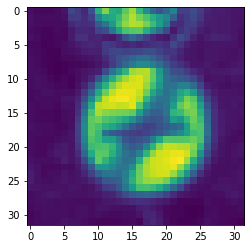

In [47]:
plt.imshow(color.rgb2gray(X_train[0]))